In [23]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from sklearn.cluster import KMeans

# Vis Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Custom Module Imports
import env
import wrangle

In [4]:
df = wrangle.prepare_zillow(wrangle.acquire_zillow())

In [5]:
# bin logerror
df['logerror_bin'] = pd.cut(df.logerror, bins = [-5, -2, 0, 2, 5])

In [6]:
train, val, test = wrangle.split_data(df)
cols_to_scale = ['baths','beds','area', 'city_id','tax_value', 'year_built']
train_scaled, val_scaled, test_scaled = wrangle.scale_data(train, val, test, cols_to_scale)

In [7]:
train.city_id.value_counts(normalize=True)

12447.0    0.222664
5534.0     0.035177
40227.0    0.029588
46298.0    0.028667
16764.0    0.020153
             ...   
14906.0    0.000033
31134.0    0.000033
10815.0    0.000033
21395.0    0.000033
36078.0    0.000033
Name: city_id, Length: 175, dtype: float64

In [10]:
train.head().T

,22304,8815,25011,44006,27970
basement_sqft,0.0,0.0,0.0,0.0,0.0
baths,2.0,3.0,3.0,2.0,2.5
beds,3.0,4.0,4.0,3.0,4.0
bathnbed,2.0,3.0,3.0,2.0,2.5
decktype,0.0,0.0,0.0,0.0,0.0
area,2053.0,2996.0,2003.0,1627.0,2207.0
area12,2053.0,2996.0,2003.0,1627.0,2207.0
county,6037.0,6037.0,6037.0,6111.0,6059.0
fireplace,0.0,0.0,0.0,1.0,1.0
fullbath,2.0,3.0,3.0,2.0,2.0


In [8]:
train.columns

Index(['basement_sqft', 'baths', 'beds', 'bathnbed', 'decktype', 'area',
       'area12', 'county', 'fireplace', 'fullbath', 'hottub_or_spa', 'lat',
       'long', 'lotsize', 'pool', 'pool10', 'pool2', 'pool7', 'landuse_code',
       'raw_census', 'city_id', 'county_id', 'zip_id', 'rooms',
       'threequarterbnb', 'year_built', 'fireplace_flag', 'structure_value',
       'tax_value', 'assessment_year', 'land_value', 'taxes', 'tax_delq_flag',
       'tax_delq_year', 'census', 'logerror', 'transactiondate',
       'construction_type', 'landuse_desc', 'logerror_bin'],
      dtype='object')

decktype
0.0     30187
66.0      231
Name: decktype, dtype: int64
0.0     99.240581
66.0     0.759419
Name: decktype, dtype: float64


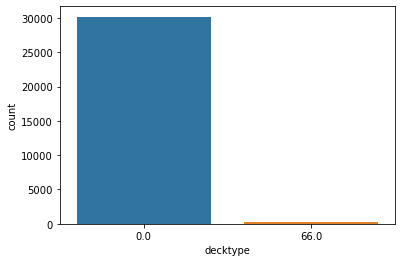

county
6037.0    19781
6059.0     8015
6111.0     2622
Name: county, dtype: int64
6037.0    65.030574
6059.0    26.349530
6111.0     8.619896
Name: county, dtype: float64


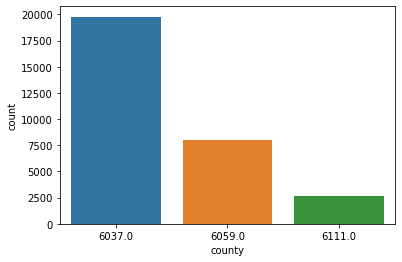

pool
0.0    23990
1.0     6428
Name: pool, dtype: int64
0.0    78.867776
1.0    21.132224
Name: pool, dtype: float64


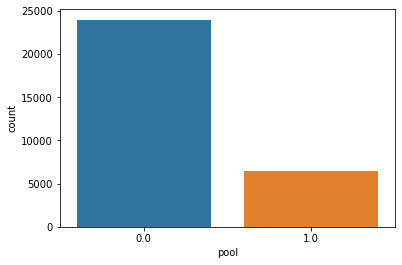

pool10
0.0    30162
1.0      256
Name: pool10, dtype: int64
0.0    99.158393
1.0     0.841607
Name: pool10, dtype: float64


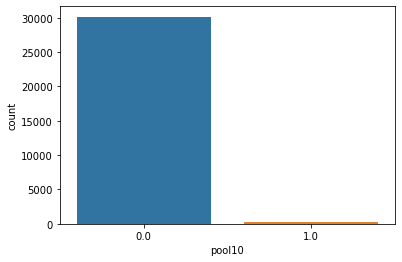

pool2
0.0    29802
1.0      616
Name: pool2, dtype: int64
0.0    97.974883
1.0     2.025117
Name: pool2, dtype: float64


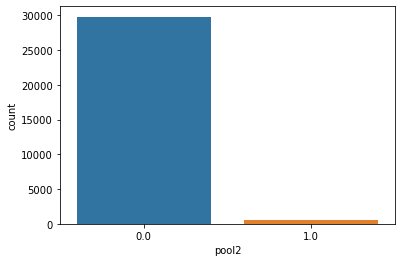

pool7
0.0    24614
1.0     5804
Name: pool7, dtype: int64
0.0    80.919193
1.0    19.080807
Name: pool7, dtype: float64


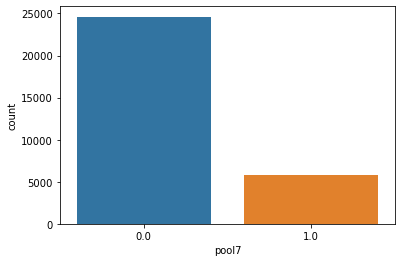

landuse_code
0100    15644
122      7415
0101     3713
1111     2028
1         600
1110      593
0104      231
0103       56
010G       49
010M       33
0108       32
0109       12
0110        4
0113        2
0102        2
0111        2
0131        1
1112        1
Name: landuse_code, dtype: int64
0100    51.430074
122     24.377014
0101    12.206588
1111     6.667105
1        1.972516
1110     1.949504
0104     0.759419
0103     0.184102
010G     0.161089
010M     0.108488
0108     0.105201
0109     0.039450
0110     0.013150
0113     0.006575
0102     0.006575
0111     0.006575
0131     0.003288
1112     0.003288
Name: landuse_code, dtype: float64


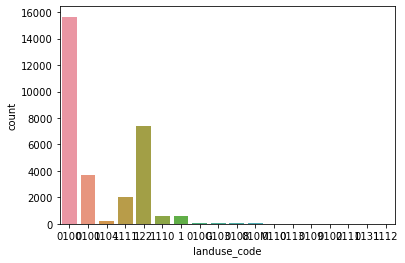

raw_census
6.037920e+07    20
6.037261e+07    13
6.059022e+07    13
6.111007e+07    13
6.037142e+07    12
                ..
6.059089e+07     1
6.037404e+07     1
6.111005e+07     1
6.037544e+07     1
6.037911e+07     1
Name: raw_census, Length: 21410, dtype: int64
6.037920e+07    0.065751
6.037261e+07    0.042738
6.059022e+07    0.042738
6.111007e+07    0.042738
6.037142e+07    0.039450
                  ...   
6.059089e+07    0.003288
6.037404e+07    0.003288
6.111005e+07    0.003288
6.037544e+07    0.003288
6.037911e+07    0.003288
Name: raw_census, Length: 21410, dtype: float64


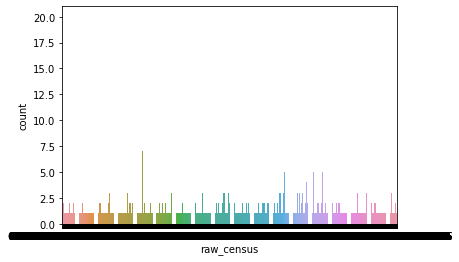

city_id
12447.0    6773
5534.0     1070
40227.0     900
46298.0     872
16764.0     613
           ... 
14906.0       1
31134.0       1
10815.0       1
21395.0       1
36078.0       1
Name: city_id, Length: 175, dtype: int64
12447.0    22.266421
5534.0      3.517654
40227.0     2.958774
46298.0     2.866724
16764.0     2.015254
             ...    
14906.0     0.003288
31134.0     0.003288
10815.0     0.003288
21395.0     0.003288
36078.0     0.003288
Name: city_id, Length: 175, dtype: float64


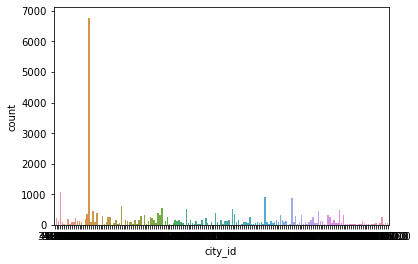

county_id
3101.0    19781
1286.0     8015
2061.0     2622
Name: county_id, dtype: int64
3101.0    65.030574
1286.0    26.349530
2061.0     8.619896
Name: county_id, dtype: float64


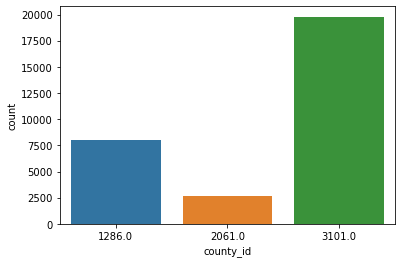

zip_id
97319.0    469
97318.0    384
97329.0    351
97328.0    312
97118.0    297
          ... 
96323.0      1
95996.0      1
96467.0      1
96148.0      1
96002.0      1
Name: zip_id, Length: 374, dtype: int64
97319.0    1.541850
97318.0    1.262410
97329.0    1.153922
97328.0    1.025708
97118.0    0.976396
             ...   
96323.0    0.003288
95996.0    0.003288
96467.0    0.003288
96148.0    0.003288
96002.0    0.003288
Name: zip_id, Length: 374, dtype: float64


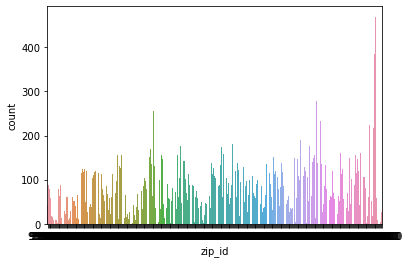

hottub_or_spa
0.0    29546
1.0      872
Name: hottub_or_spa, dtype: int64
0.0    97.133276
1.0     2.866724
Name: hottub_or_spa, dtype: float64


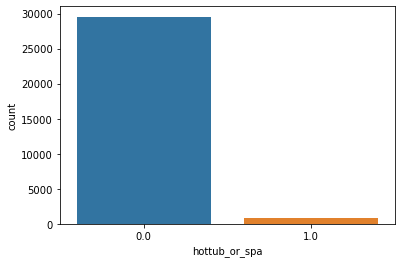

fireplace_flag
0.0    30378
1.0       40
Name: fireplace_flag, dtype: int64
0.0    99.868499
1.0     0.131501
Name: fireplace_flag, dtype: float64


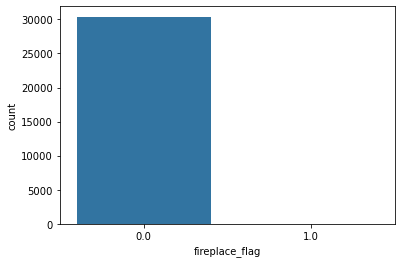

tax_delq_flag
N    29209
Y     1209
Name: tax_delq_flag, dtype: int64
N    96.02538
Y     3.97462
Name: tax_delq_flag, dtype: float64


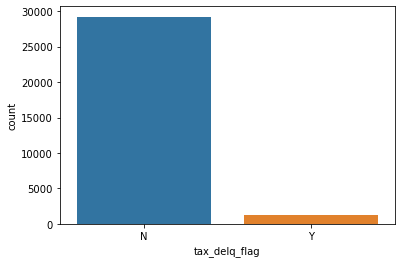

census
6.037920e+13    20
6.037261e+13    13
6.111007e+13    13
6.059032e+13    13
6.111006e+13    12
                ..
6.037407e+13     1
6.037554e+13     1
6.059089e+13     1
6.037404e+13     1
6.037911e+13     1
Name: census, Length: 21412, dtype: int64
6.037920e+13    0.065751
6.037261e+13    0.042738
6.111007e+13    0.042738
6.059032e+13    0.042738
6.111006e+13    0.039450
                  ...   
6.037407e+13    0.003288
6.037554e+13    0.003288
6.059089e+13    0.003288
6.037404e+13    0.003288
6.037911e+13    0.003288
Name: census, Length: 21412, dtype: float64


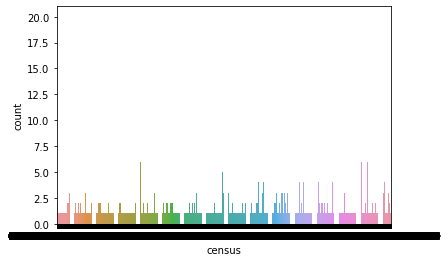

transactiondate
2017-06-30    454
2017-04-28    354
2017-05-31    347
2017-08-31    321
2017-05-26    321
             ... 
2017-02-04      1
2017-06-24      1
2017-01-14      1
2017-01-28      1
2017-07-23      1
Name: transactiondate, Length: 245, dtype: int64
2017-06-30    1.492537
2017-04-28    1.163785
2017-05-31    1.140772
2017-08-31    1.055296
2017-05-26    1.055296
                ...   
2017-02-04    0.003288
2017-06-24    0.003288
2017-01-14    0.003288
2017-01-28    0.003288
2017-07-23    0.003288
Name: transactiondate, Length: 245, dtype: float64


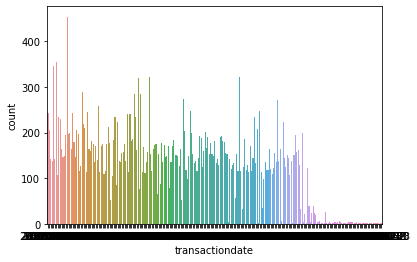

construction_type
None        30380
Frame          37
Concrete        1
Name: construction_type, dtype: int64
None        99.875074
Frame        0.121639
Concrete     0.003288
Name: construction_type, dtype: float64


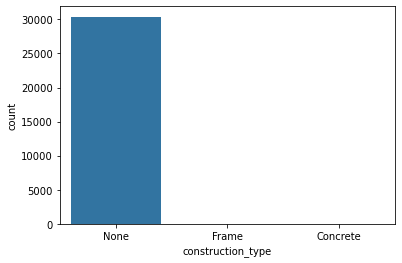

landuse_desc
Single Family Residential    30418
Name: landuse_desc, dtype: int64
Single Family Residential    100.0
Name: landuse_desc, dtype: float64


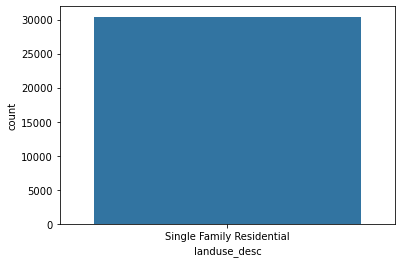

logerror_bin
(0, 2]      17102
(-2, 0]     13254
(2, 5]         50
(-5, -2]       11
Name: logerror_bin, dtype: int64
(0, 2]      56.225137
(-2, 0]     43.574317
(2, 5]       0.164382
(-5, -2]     0.036164
Name: logerror_bin, dtype: float64


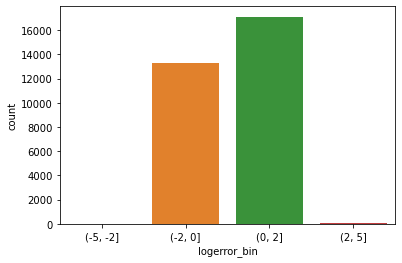

In [12]:
num_vars = ['basement_sqft', 'baths', 'beds', 'bathnbed', 'area', 'area12', 'logerror', 'fullbath',
           'lat', 'long', 'lotsize', 'rooms', 'threequarterbnb', 'year_built', 'structure_value',
           'tax_value', 'land_value', 'taxes', 'logerror']
cat_vars = ['decktype', 'county', 'pool', 'pool10', 'pool2', 'pool7', 'landuse_code'
           ,'raw_census', 'city_id', 'county_id', 'zip_id', 'hottub_or_spa', 'fireplace_flag', 'tax_delq_flag',
           'census', 'transactiondate', 'construction_type', 'landuse_desc', 'logerror_bin']

for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

In [12]:
df.logerror.describe().T

count    50698.000000
mean         0.018242
std          0.175283
min         -4.655420
25%         -0.024718
50%          0.006900
75%          0.040489
max          5.262999
Name: logerror, dtype: float64

In [45]:
logerror_city = pd.DataFrame(train[['city_id', 'logerror_bin']].groupby(['logerror_bin']).value_counts())

In [47]:
logerror_city.head()

0
logerror_bin city_id   
(-5, -2]     12447.0  2
             12773.0  1
             25459.0  1
             24174.0  1
             26965.0  1

In [49]:
logerror_city = pd.crosstab(train.logerror_bin, train.city_id)
logerror_city.head()

city_id,3491.0,4406.0,5465.0,5534.0,6021.0,6395.0,6822.0,8384.0,9840.0,10241.0,...,118880.0,118895.0,118914.0,118994.0,272578.0,396053.0,396054.0,396550.0,396551.0,396556.0
logerror_bin,,,,,,,,,,,,,,,,,,,,,
"(-5, -2]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(-2, 0]",2,107,62,516,50,14,5,85,14,28,...,2,9,18,31,3,30,125,15,34,25
"(0, 2]",2,119,70,554,41,22,6,93,29,68,...,1,17,26,16,8,30,135,17,33,37
"(2, 5]",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0


In [64]:
logerror_city.iloc[0] == 2

city_id
3491.0      False
4406.0      False
5465.0      False
5534.0      False
6021.0      False
            ...  
396053.0    False
396054.0    False
396550.0    False
396551.0    False
396556.0    False
Name: (-5, -2], Length: 175, dtype: bool

In [65]:
logerror_city.iloc[0][logerror_city.iloc[0] == 2]

city_id
12447.0    2
Name: (-5, -2], dtype: int64

In [66]:
logerror_city.iloc[3].max()

6

In [67]:
logerror_city.iloc[3][logerror_city.iloc[3] == 6]

city_id
12447.0    6
Name: (2, 5], dtype: int64

In [15]:
train_scaled.head()

,basement_sqft,baths,beds,bathnbed,decktype,area,area12,county,fireplace,fullbath,...,land_value,taxes,tax_delq_flag,tax_delq_year,census,logerror,transactiondate,construction_type,landuse_desc,logerror_bin
22304,0.0,0.153846,0.272727,2.0,0.0,0.093976,2053.0,6037.0,0.0,2.0,...,58189.0,3512.57,N,99999.0,6.037901e+13,0.080855,2017-05-05,None,Single Family Residential,"(0, 2]"
8815,0.0,0.230769,0.363636,3.0,0.0,0.140012,2996.0,6037.0,0.0,3.0,...,519702.0,15005.62,N,99999.0,6.037272e+13,-0.084714,2017-02-28,None,Single Family Residential,"(-2, 0]"
25011,0.0,0.230769,0.363636,3.0,0.0,0.091535,2003.0,6037.0,0.0,3.0,...,442718.0,7535.17,N,99999.0,6.037621e+13,0.019131,2017-05-18,None,Single Family Residential,"(0, 2]"
44006,0.0,0.153846,0.272727,2.0,0.0,0.073179,1627.0,6111.0,1.0,2.0,...,144926.0,4348.94,N,99999.0,6.111001e+13,-0.032695,2017-08-10,None,Single Family Residential,"(-2, 0]"
27970,0.0,0.192308,0.363636,2.5,0.0,0.101494,2207.0,6059.0,1.0,2.0,...,562467.0,7937.82,Y,15.0,6.059076e+13,0.054198,2017-05-31,None,Single Family Residential,"(0, 2]"


In [19]:
cols = ['basement_sqft', 'baths', 'beds', 'bathnbed', 'area', 'area12', 'fullbath',
           'lat', 'long', 'lotsize', 'rooms', 'threequarterbnb', 'year_built', 'structure_value',
           'tax_value', 'land_value', 'taxes']
X_train = train_scaled[cols]

In [24]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
kmeans.predict(X_train)
train['cluster'] = kmeans.predict(X_train)
kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_train.columns)
centroids

,basement_sqft,baths,beds,bathnbed,area,area12,fullbath,lat,long,lotsize,rooms,threequarterbnb,year_built,structure_value,tax_value,land_value,taxes
0,-4.773959e-15,0.173406,0.304074,2.254278,0.083947,1847.561792,2.148224,3.382169e+07,-1.179109e+08,7450.235151,2.875808e+00,2.121074e-01,0.630892,1.607195e+05,0.016953,2.727764e+05,5195.063683
1,-2.331468e-15,0.156903,0.280087,2.039737,0.075052,1665.362485,2.039737,3.419192e+07,-1.183026e+08,14546.743316,1.132427e-14,-1.221245e-15,0.545116,1.346219e+05,0.013129,2.018159e+05,4397.172430
2,1.228378e+00,0.283233,0.354540,3.682024,0.161333,3432.742227,3.587337,3.394322e+07,-1.182606e+08,17338.547767,1.135105e+00,1.893725e-01,0.641563,6.579517e+05,0.081903,1.423832e+06,24212.268044
3,1.110223e-16,0.443891,0.435294,5.770588,0.291541,6099.917647,5.635294,3.394827e+07,-1.183486e+08,30435.564706,9.647059e-01,2.705882e-01,0.676032,2.159976e+06,0.347910,6.672538e+06,101639.608235
4,4.567791e+00,0.194620,0.326325,2.530061,0.098396,2143.542945,2.409202,3.424785e+07,-1.189091e+08,13248.758282,5.504908e+00,2.417178e-01,0.699199,2.398888e+05,0.020029,2.716648e+05,6037.881061


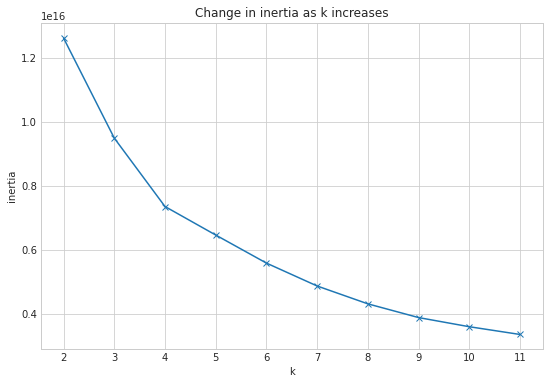

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

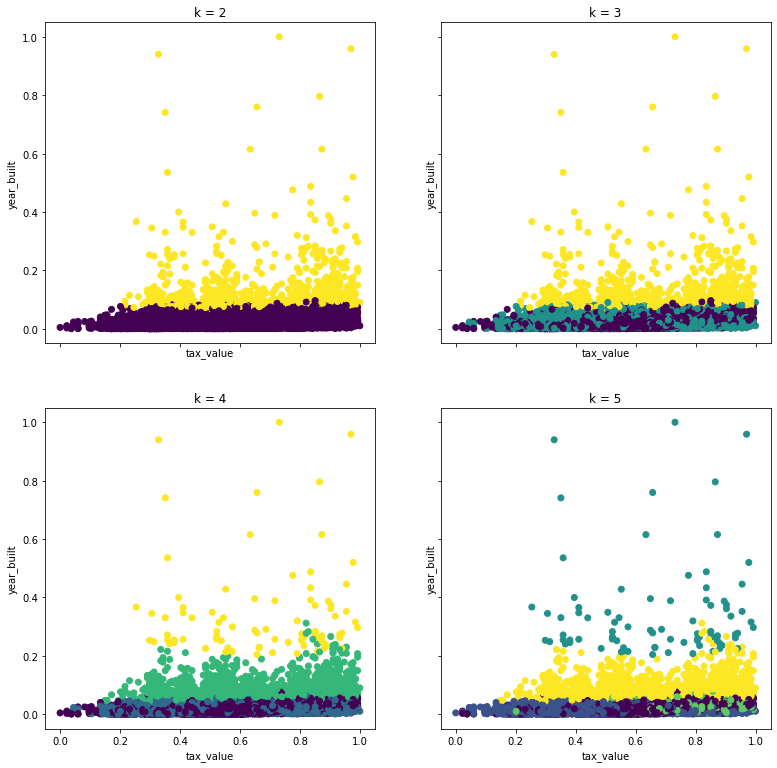

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_train).predict(X_train)
    ax.scatter(X_train.year_built, X_train.tax_value, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='tax_value', ylabel='year_built')

In [47]:
my_palette = sns.choose_dark_palette()

interactive(children=(IntSlider(value=179, description='h', max=359), IntSlider(value=49, description='s', max…

In [49]:
train.dtypes

basement_sqft         float64
baths                 float64
beds                  float64
bathnbed              float64
decktype              float64
area                  float64
area12                float64
county                float64
fireplace             float64
fullbath              float64
hottub_or_spa         float64
lat                   float64
long                  float64
lotsize               float64
pool                  float64
pool10                float64
pool2                 float64
pool7                 float64
landuse_code           object
raw_census            float64
city_id               float64
county_id             float64
zip_id                float64
rooms                 float64
threequarterbnb       float64
year_built            float64
fireplace_flag        float64
structure_value       float64
tax_value             float64
assessment_year       float64
land_value            float64
taxes                 float64
tax_delq_flag          object
tax_delq_y

In [50]:
train.head().T

,22304,8815,25011,44006,27970
basement_sqft,0.0,0.0,0.0,0.0,0.0
baths,2.0,3.0,3.0,2.0,2.5
beds,3.0,4.0,4.0,3.0,4.0
bathnbed,2.0,3.0,3.0,2.0,2.5
decktype,0.0,0.0,0.0,0.0,0.0
area,2053.0,2996.0,2003.0,1627.0,2207.0
area12,2053.0,2996.0,2003.0,1627.0,2207.0
county,6037.0,6037.0,6037.0,6111.0,6059.0
fireplace,0.0,0.0,0.0,1.0,1.0
fullbath,2.0,3.0,3.0,2.0,2.0
